# Decision Tree Classifier

A decision tree classifier is a supervised machine learning algorithm that predicts the class of an instance by learning decision rules from data features, represented in a tree-like structure using nodes, branches and leaves.

## Structure (linear)

- Root node → best feature  
- Decision node → feature conditions  
- Leaf nodes → final class label

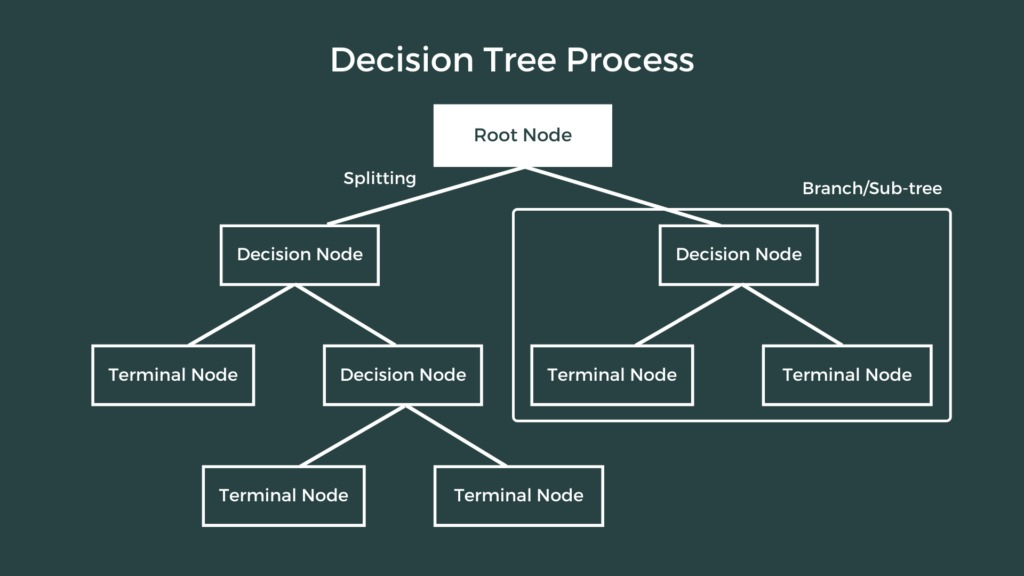

## Working Flow

**Step 1:** Take training dataset.  

**Step 2:** Calculate Entropy / Gini Index.  

**Step 3:** Compute Information Gain for each feature.  

**Step 4:** Select feature with highest Information Gain as root.  

**Step 5:** Split dataset.  

**Step 6:** Repeat until:  
- all data is pure (OR) no feature gain  
- assign class at leaf node  

## Formulae

### Entropy

$$
Entropy(S) = - \sum p_i \log_2(p_i)
$$

### Information Gain

$$
IG(S, A) = Entropy(S) - \sum \left(\frac{|S_v|}{|S|}\right) Entropy(S_v)
$$


## Example

**Step 1:** Dataset

| Outlook  | Humidity | Wind   | Play |
|---------|----------|--------|------|
| Sunny   | High     | Weak   | No   |
| Sunny   | High     | Strong | No   |
| Overcast| High     | Weak   | Yes  |
| Rain    | Normal   | Weak   | Yes  |
| Rain    | Normal   | Strong | No   |
| Overcast| Normal   | Strong | Yes  |

## Step 2: Calculate Entropy of total dataset

Count target class:

- Yes = 3  
- No = 3  

### Entropy formula

$$
\begin{aligned}
Entropy(S) &= - P(Yes)\log_2 P(Yes) - P(No)\log_2 P(No) \\
           &= - \frac{3}{6}\log_2\left(\frac{3}{6}\right) - \frac{3}{6}\log_2\left(\frac{3}{6}\right) \\
           &= -0.5(-1) - 0.5(-1) \\
           &= 0.5 + 0.5 \\
           &= 1
\end{aligned}
$$


## Step 3: Compute Information Gain for each feature

### Feature 1: Outlook

Values: Sunny, Overcast, Rainy

#### Sunny

- Yes → 0  
- No → 2  

$$
\begin{aligned}
S &= - \frac{0}{2}\log_2\left(\frac{0}{2}\right) - \frac{2}{2}\log_2\left(\frac{2}{2}\right) \\
  &= -0 - \log(1) \\
  &= 0
\end{aligned}
$$

$$
\begin{aligned}
Entropy(Sunny) &= 0
\end{aligned}
$$

#### Overcast

- Yes → 2  
- No → 0  

$$
\begin{aligned}
Entropy(Overcast) &= - \frac{2}{2}\log_2\left(\frac{2}{2}\right) - \frac{0}{2}\log_2\left(\frac{0}{2}\right) \\
                  &= -\log(1) - 0 \\
                  &= 0
\end{aligned}
$$


### Rainy

- Yes → 1  
- No → 1  

$$
\begin{aligned}
Entropy(Rainy) &= - \frac{1}{2}\log_2\left(\frac{1}{2}\right) - \frac{1}{2}\log_2\left(\frac{1}{2}\right) \\
               &= - \frac{1}{2}(-1) - \frac{1}{2}(-1) \\
               &= \frac{1}{2} + \frac{1}{2} \\
               &= 1
\end{aligned}
$$


### Weighted Entropy

$$
\begin{aligned}
&= \frac{2}{6}(0) + \frac{2}{6}(0) + \frac{2}{6}(1) \\
&= 0 + 0 + \frac{1}{3} \\
&= 0.33
\end{aligned}
$$


### Information Gain (IG)

$$
\begin{aligned}
IG(Outlook) &= 1 - 0.33 \\
            &= 0.67
\end{aligned}
$$


## Feature 2: Humidity

Values: High, Normal

### High

- Yes → 1  
- No → 2  

$$
\begin{aligned}
Entropy(High) &= - \frac{1}{3}\log_2\left(\frac{1}{3}\right) - \frac{2}{3}\log_2\left(\frac{2}{3}\right) \\
              &= 0.918
\end{aligned}
$$

### Normal

- Yes → 2  
- No → 1  

$$
\begin{aligned}
Entropy(Normal) &= - \frac{2}{3}\log_2\left(\frac{2}{3}\right) - \frac{1}{3}\log_2\left(\frac{1}{3}\right) \\
                &= 0.918
\end{aligned}
$$

### Weighted Entropy

$$
\begin{aligned}
&= \frac{3}{6}(0.918) + \frac{3}{6}(0.918) \\
&= 0.918
\end{aligned}
$$


### Information Gain (IG)

$$
\begin{aligned}
IG(Humidity) &= 1 - 0.918 \\
             &= 0.082
\end{aligned}
$$


## Feature 3: Wind

Values: Weak, Strong

### Weak

- Yes → 2  
- No → 1  

$$
Entropy(Weak) = 0.918
$$

### Strong

- Yes → 1  
- No → 2  

$$
Entropy(Strong) = 0.918
$$


### Weighted Entropy

$$
\begin{aligned}
&= \frac{3}{6}(0.918) + \frac{3}{6}(0.918) \\
&= 0.918
\end{aligned}
$$


### Information Gain (IG)

$$
\begin{aligned}
IG(Wind) &= 1 - 0.918 \\
         &= 0.082
\end{aligned}
$$


## Step 4: Select Feature with Highest Information Gain

| Feature   | IG    |
|----------|-------|
| Outlook  | 0.67  |
| Humidity | 0.082 |
| Wind     | 0.082 |


**Therefore, Root node = Outlook**

## Step 5: Split dataset

               Outlook
           /      |      \
       Sunny  Overcast  Rainy
         |        |        |
        No       Yes       ?


## Step 6: Repeat for remaining branch (Rain)

| Humidity | Wind   | Play |
|---------|--------|------|
| Normal  | Weak   | Yes  |
| Normal  | Strong | No   |

Total entropy = 1

Try split on wind:

- Weak → 1 → (Entropy = 0)  
- Strong → 1 → (Entropy = 0)


## Step 7: Assign class at leaf node

                    Outlook
               /       |       \
           Sunny   Overcast   Rainy
             |        |       /    \
            No       Yes   Weak   Strong
                               |       |
                              Yes      No
 

## Step 8: New prediction

- Sunny, High, Weak → ? → No  
- Rainy, Normal, Strong → ? → No

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Overcast"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Strong", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
print(df)

    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain   Normal    Weak  Yes
4      Rain   Normal  Strong   No
5  Overcast   Normal  Strong  Yes


In [3]:
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Data:\n", df)


Encoded Data:
    Outlook  Humidity  Wind  Play
0        2         0     1     0
1        2         0     0     0
2        0         0     1     1
3        1         1     1     1
4        1         1     0     0
5        0         1     0     1


In [4]:
X = df.drop("Play", axis=1)
y = df["Play"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
X_train

,Outlook,Humidity,Wind
5,0,1,0
2,0,0,1
4,1,1,0
3,1,1,1


In [7]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 0]


In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [10]:
new_data = pd.DataFrame([[2, 1, 1]], columns = X.columns)
prediction = model.predict(new_data)

print("New Data Prediction:", "Yes" if prediction[0] == 1 else "No")

New Data Prediction: Yes


In [11]:
importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f" (feature): (importance:.3f)")

 (feature): (importance:.3f)
 (feature): (importance:.3f)
 (feature): (importance:.3f)


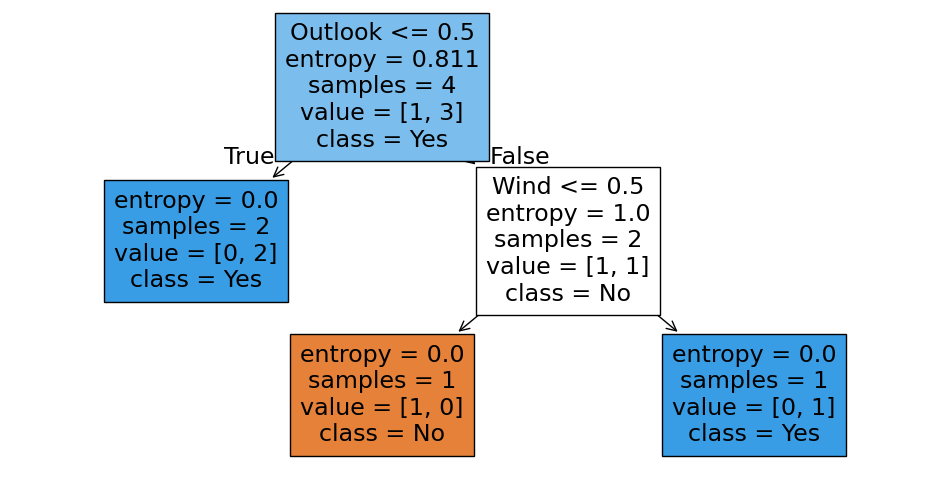

In [12]:
plt.figure(figsize=(12, 6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.show()